<a href="https://colab.research.google.com/github/iam-fern/Generate_addition_4X/blob/main/GQtest_data_add_delta_(3_6)_n120_01.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import os
import statistics as stats
import scipy.stats as ss
from scipy.stats import f_oneway
from scipy import stats
from google.colab import drive
import scipy.stats as stats
import time
import statsmodels.api as sm
from google.colab import files

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [3]:
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
base_path = '/content/drive/My Drive/pattern_addition_4X/addition_delta_3.6'

In [5]:
os.listdir(base_path)

['data_add_delta_3.6_n20.csv',
 'data_add_delta_3.6_n30.csv',
 'data_add_delta_3.6_n60.csv',
 'data_add_delta_3.6_n120.csv',
 'data_add_delta_3.6_n250.csv']

In [6]:
# เรียกใช้ข้อมูลจากไฟล์ โดยผ่านฟังก์ชัน ที่ชื่อว่า read_csv
file_path = os.path.join(base_path, 'data_add_delta_3.6_n120.csv')
pd.read_csv(file_path)

,rep,index,x1,x2,x3,x4,e,Y,y_hat,e_hat
0,0.0,0.0,47.463423,38.038963,28.631001,44.127840,891.024518,1059.285746,218.493825,840.791921
1,0.0,1.0,35.171114,80.061004,28.748141,99.074932,579.647058,832.702249,528.268427,304.433823
2,0.0,2.0,30.478600,46.545219,69.803601,50.760089,-618.482975,-410.895466,346.038000,-756.933465
3,0.0,3.0,43.546982,34.196884,98.340867,75.138898,51.490824,312.714455,450.912234,-138.197779
4,0.0,4.0,66.109777,22.679925,69.532080,62.018132,89.451369,319.791284,289.813052,29.978232
...,...,...,...,...,...,...,...,...,...,...
119995,999.0,115.0,81.722698,56.922919,97.647005,22.975010,1113.583569,1382.851201,489.269886,893.581315
119996,999.0,116.0,54.197620,82.151544,72.962836,74.489681,-164.705870,129.095811,617.867077,-488.771266
119997,999.0,117.0,86.789047,47.928580,40.298861,97.764064,-817.305447,-534.524895,388.986806,-923.511701
119998,999.0,118.0,21.413666,84.150303,56.254156,73.129713,-4528.163705,-4283.215867,381.000548,-4664.216415


In [7]:
df = pd.read_csv(file_path)
df

,rep,index,x1,x2,x3,x4,e,Y,y_hat,e_hat
0,0.0,0.0,47.463423,38.038963,28.631001,44.127840,891.024518,1059.285746,218.493825,840.791921
1,0.0,1.0,35.171114,80.061004,28.748141,99.074932,579.647058,832.702249,528.268427,304.433823
2,0.0,2.0,30.478600,46.545219,69.803601,50.760089,-618.482975,-410.895466,346.038000,-756.933465
3,0.0,3.0,43.546982,34.196884,98.340867,75.138898,51.490824,312.714455,450.912234,-138.197779
4,0.0,4.0,66.109777,22.679925,69.532080,62.018132,89.451369,319.791284,289.813052,29.978232
...,...,...,...,...,...,...,...,...,...,...
119995,999.0,115.0,81.722698,56.922919,97.647005,22.975010,1113.583569,1382.851201,489.269886,893.581315
119996,999.0,116.0,54.197620,82.151544,72.962836,74.489681,-164.705870,129.095811,617.867077,-488.771266
119997,999.0,117.0,86.789047,47.928580,40.298861,97.764064,-817.305447,-534.524895,388.986806,-923.511701
119998,999.0,118.0,21.413666,84.150303,56.254156,73.129713,-4528.163705,-4283.215867,381.000548,-4664.216415


In [8]:
df = pd.read_csv(file_path, index_col=['rep', 'index'])
df

x1         x2         x3         x4            e  \
rep   index                                                            
0.0   0.0    47.463423  38.038963  28.631001  44.127840   891.024518   
      1.0    35.171114  80.061004  28.748141  99.074932   579.647058   
      2.0    30.478600  46.545219  69.803601  50.760089  -618.482975   
      3.0    43.546982  34.196884  98.340867  75.138898    51.490824   
      4.0    66.109777  22.679925  69.532080  62.018132    89.451369   
...                ...        ...        ...        ...          ...   
999.0 115.0  81.722698  56.922919  97.647005  22.975010  1113.583569   
      116.0  54.197620  82.151544  72.962836  74.489681  -164.705870   
      117.0  86.789047  47.928580  40.298861  97.764064  -817.305447   
      118.0  21.413666  84.150303  56.254156  73.129713 -4528.163705   
      119.0  49.435869  59.793924  93.134599  90.456769  1951.433643   

                       Y       y_hat        e_hat  
rep   index                                        
0.0   0.0    1059.285746  218.493825   840.791921  
      1.0     832.702249  528.268427   304.433823  
      2.0    -410.895466  346.038000  -756.933465  
      3.0     312.714455  450.912234  -138.197779  
      4.0     319.791284  289.813052    29.978232  
...                  ...         ...          ...  
999.0 115.0  1382.851201  489.269886   893.581315  
      116.0   129.095811  617.867077  -488.771266  
      117.0  -534.524895  388.986806  -923.511701  
      118.0 -4283.215867  381.000548 -4664.216415  
      119.0  2254.254805  719.701890  1534.552915  

[120000 rows x 8 columns]

In [9]:
# ลบข้อมูลที่มี missing values
table = df.dropna()
table

x1         x2         x3         x4            e  \
rep   index                                                            
0.0   0.0    47.463423  38.038963  28.631001  44.127840   891.024518   
      1.0    35.171114  80.061004  28.748141  99.074932   579.647058   
      2.0    30.478600  46.545219  69.803601  50.760089  -618.482975   
      3.0    43.546982  34.196884  98.340867  75.138898    51.490824   
      4.0    66.109777  22.679925  69.532080  62.018132    89.451369   
...                ...        ...        ...        ...          ...   
999.0 115.0  81.722698  56.922919  97.647005  22.975010  1113.583569   
      116.0  54.197620  82.151544  72.962836  74.489681  -164.705870   
      117.0  86.789047  47.928580  40.298861  97.764064  -817.305447   
      118.0  21.413666  84.150303  56.254156  73.129713 -4528.163705   
      119.0  49.435869  59.793924  93.134599  90.456769  1951.433643   

                       Y       y_hat        e_hat  
rep   index                                        
0.0   0.0    1059.285746  218.493825   840.791921  
      1.0     832.702249  528.268427   304.433823  
      2.0    -410.895466  346.038000  -756.933465  
      3.0     312.714455  450.912234  -138.197779  
      4.0     319.791284  289.813052    29.978232  
...                  ...         ...          ...  
999.0 115.0  1382.851201  489.269886   893.581315  
      116.0   129.095811  617.867077  -488.771266  
      117.0  -534.524895  388.986806  -923.511701  
      118.0 -4283.215867  381.000548 -4664.216415  
      119.0  2254.254805  719.701890  1534.552915  

[120000 rows x 8 columns]

In [10]:
table.reset_index(inplace=True)
table

,rep,index,x1,x2,x3,x4,e,Y,y_hat,e_hat
0,0.0,0.0,47.463423,38.038963,28.631001,44.127840,891.024518,1059.285746,218.493825,840.791921
1,0.0,1.0,35.171114,80.061004,28.748141,99.074932,579.647058,832.702249,528.268427,304.433823
2,0.0,2.0,30.478600,46.545219,69.803601,50.760089,-618.482975,-410.895466,346.038000,-756.933465
3,0.0,3.0,43.546982,34.196884,98.340867,75.138898,51.490824,312.714455,450.912234,-138.197779
4,0.0,4.0,66.109777,22.679925,69.532080,62.018132,89.451369,319.791284,289.813052,29.978232
...,...,...,...,...,...,...,...,...,...,...
119995,999.0,115.0,81.722698,56.922919,97.647005,22.975010,1113.583569,1382.851201,489.269886,893.581315
119996,999.0,116.0,54.197620,82.151544,72.962836,74.489681,-164.705870,129.095811,617.867077,-488.771266
119997,999.0,117.0,86.789047,47.928580,40.298861,97.764064,-817.305447,-534.524895,388.986806,-923.511701
119998,999.0,118.0,21.413666,84.150303,56.254156,73.129713,-4528.163705,-4283.215867,381.000548,-4664.216415


In [11]:
table.set_index(['rep', 'index'], inplace=True)

In [12]:
table

x1         x2         x3         x4            e  \
rep   index                                                            
0.0   0.0    47.463423  38.038963  28.631001  44.127840   891.024518   
      1.0    35.171114  80.061004  28.748141  99.074932   579.647058   
      2.0    30.478600  46.545219  69.803601  50.760089  -618.482975   
      3.0    43.546982  34.196884  98.340867  75.138898    51.490824   
      4.0    66.109777  22.679925  69.532080  62.018132    89.451369   
...                ...        ...        ...        ...          ...   
999.0 115.0  81.722698  56.922919  97.647005  22.975010  1113.583569   
      116.0  54.197620  82.151544  72.962836  74.489681  -164.705870   
      117.0  86.789047  47.928580  40.298861  97.764064  -817.305447   
      118.0  21.413666  84.150303  56.254156  73.129713 -4528.163705   
      119.0  49.435869  59.793924  93.134599  90.456769  1951.433643   

                       Y       y_hat        e_hat  
rep   index                                        
0.0   0.0    1059.285746  218.493825   840.791921  
      1.0     832.702249  528.268427   304.433823  
      2.0    -410.895466  346.038000  -756.933465  
      3.0     312.714455  450.912234  -138.197779  
      4.0     319.791284  289.813052    29.978232  
...                  ...         ...          ...  
999.0 115.0  1382.851201  489.269886   893.581315  
      116.0   129.095811  617.867077  -488.771266  
      117.0  -534.524895  388.986806  -923.511701  
      118.0 -4283.215867  381.000548 -4664.216415  
      119.0  2254.254805  719.701890  1534.552915  

[120000 rows x 8 columns]

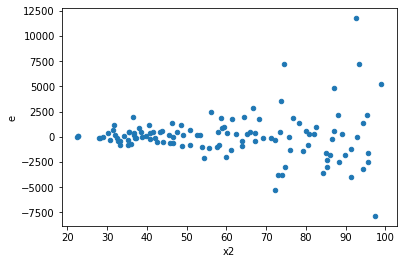

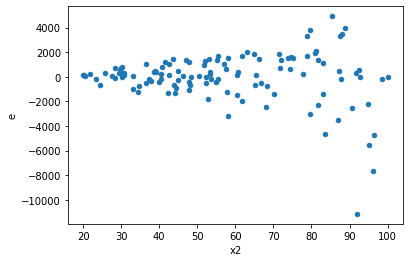

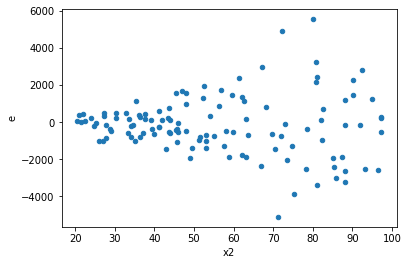

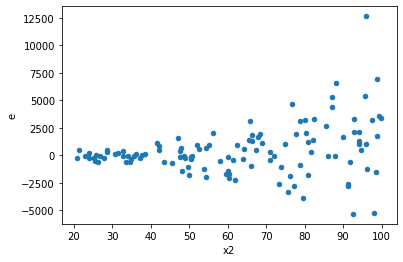

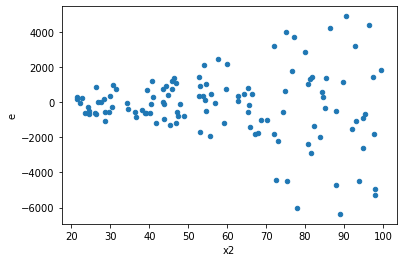

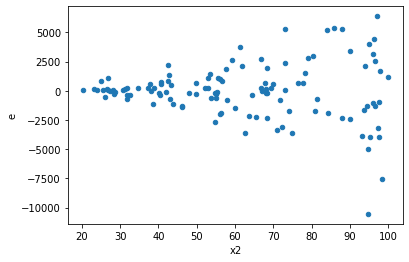

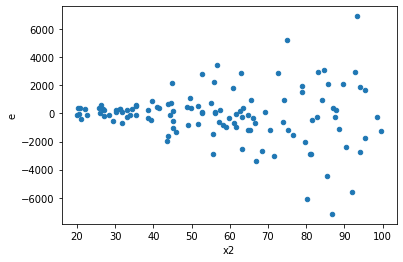

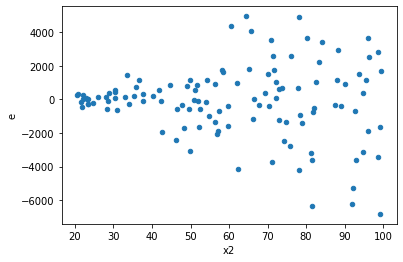

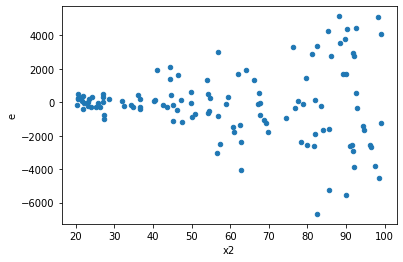

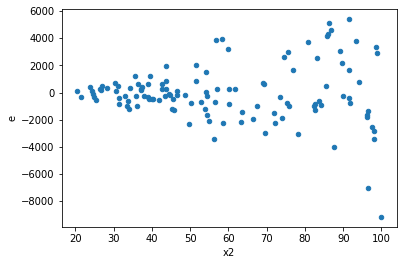

In [13]:
tablenew0 = table.loc[0.0]
tablenew1 = table.loc[1.0]
tablenew2 = table.loc[2.0]
tablenew3 = table.loc[3.0]
tablenew4 = table.loc[4.0]
tablenew5 = table.loc[5.0]
tablenew6 = table.loc[6.0]
tablenew7 = table.loc[7.0]
tablenew8 = table.loc[8.0]
tablenew9 = table.loc[9.0]
tablenew0.plot(x ='x2', y='e', kind = 'scatter')
tablenew1.plot(x ='x2', y='e', kind = 'scatter')
tablenew2.plot(x ='x2', y='e', kind = 'scatter')
tablenew3.plot(x ='x2', y='e', kind = 'scatter')
tablenew4.plot(x ='x2', y='e', kind = 'scatter')
tablenew5.plot(x ='x2', y='e', kind = 'scatter')
tablenew6.plot(x ='x2', y='e', kind = 'scatter')
tablenew7.plot(x ='x2', y='e', kind = 'scatter')
tablenew8.plot(x ='x2', y='e', kind = 'scatter')
tablenew9.plot(x ='x2', y='e', kind = 'scatter')

In [14]:
def get_result(run_replicate, percent_data):
    new_table = table.loc[run_replicate]

    # เรียง data จากน้อยไปมากตาม x2
    new_table_sort = new_table.sort_values('x2')
    new_table_sort.reset_index(inplace=True)
    new_table_sort.drop(['index'], axis=1, inplace=True)

    # แบ่งข้อมูลกลุ่มที่ 1
    table1 = new_table_sort.iloc[:int(percent_data*new_table_sort.shape[0]) , :]
    y = table1['Y']
    x = table1[['x1', 'x2', 'x3', 'x4']]
    # add constant to predictor variable
    x = sm.add_constant(x)
    # fit linear regression model
    model1 = sm.OLS(y, x).fit()

    # หาค่า df กลุ่ม 1
    DF1 = model1.df_resid + 1
    SSE1 = model1.ssr
    MSE1 = SSE1/DF1

    # แบ่งข้อมูลกลุ่มที่ 2
    table2 = new_table_sort.iloc[int((1-percent_data)*new_table_sort.shape[0]): , :]

    y = table2['Y']
    x = table2[['x1', 'x2', 'x3', 'x4']]
    x = sm.add_constant(x)
    model2 = sm.OLS(y, x).fit()
    #print(model.summary())

    # หาค่า df กลุ่ม 2
    DF2 = model2.df_resid + 1
    SSE2 = model2.ssr
    MSE2 = SSE2/DF2

    # ค่าสถิติทดสอบ
    GQ_test = (SSE2/DF2) / (SSE1/DF1)

    df2 = DF2
    df1 = DF1

    # คำนวณค่า p-value
    # pdf(x, dfn, dfd, loc=0, scale=1) : Probability density function
    two_tailed = 2.0*(1.0-(ss.f.cdf(GQ_test, df2, df1)))
    p_greater = ss.f.cdf(GQ_test, df2, df1)
    p_less = 1.0-ss.f.cdf(GQ_test, df2, df1)

    return df1, df2, SSE1, SSE2, MSE1, MSE2, GQ_test, two_tailed, p_greater, p_less

# สร้าง list ของ replicates
list_replicate=list({i[0] for i in table.index})
list_replicate.sort()

# สร้าง list เพื่อเก็บค่า ทุกรอบที่ run
list_df1=[]
list_df2=[]
list_SSE1=[]
list_SSE2=[]
list_MSE1=[]
list_MSE2=[]
list_GQ_test=[]
list_two_tailed=[]
list_p_greater=[]
list_p_less=[]

# กำหนด % การแบ่งข้อมูล
percent_data=0.4

# ใช้ for loop สำหรับการ run ทุก replicates
for run_replicate in list_replicate:
    df1, df2, SSE1, SSE2, MSE1, MSE2, GQ_test, two_tailed, p_greater, p_less=get_result(run_replicate, percent_data)
    list_df1.append(df1)
    list_SSE1.append(SSE1)
    list_df2.append(df2)
    list_SSE2.append(SSE2)
    list_MSE1.append(MSE1)
    list_MSE2.append(MSE2)
    list_GQ_test.append(GQ_test)
    list_two_tailed.append(two_tailed)
    list_p_greater.append(p_greater)
    list_p_less.append(p_less)

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


In [15]:
# สร้างตารางผลลัพธ์
alpha = 0.01
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 1000)
pd.set_option('display.width', 1000)
result=pd.DataFrame({"Replicate":list_replicate, "df1":list_df1, "df2":list_df2, "SSE1":list_SSE1,
                     "SSE2":list_SSE2, "MSE1":list_MSE1, "MSE2":list_MSE2,
                     "GQ_test":list_GQ_test, "two_tailed":list_two_tailed, "greater":list_p_greater, "less":list_p_less})
result.set_index(['Replicate'], inplace=True)
result=result[(result["two_tailed"]<=1) & (result["greater"]<=1) & (result["less"]<=1)]
result["Result_test"]=result["two_tailed"].apply(lambda p_value: 'Reject001=0 : Heteroscedasticity' 
                                                 if p_value < alpha else 'Reject001=1 : Homoscedasticity')
#two_tailed_new_show=two_tailed_new.drop(columns="greater")

result.astype(str)

,df1,df2,SSE1,SSE2,MSE1,MSE2,GQ_test,two_tailed,greater,less,Result_test
Replicate,,,,,,,,,,,
0.0,44.0,44.0,15831811.519901555,544275818.6717501,359813.8981795808,12369904.969812501,34.37861914838754,2.220446049250313e-16,0.9999999999999999,1.1102230246251565e-16,Reject001=0 : Heteroscedasticity
1.0,44.0,44.0,21995345.342895694,395602317.42356306,499894.2123385385,8990961.759626433,17.985728855643504,2.220446049250313e-16,0.9999999999999999,1.1102230246251565e-16,Reject001=0 : Heteroscedasticity
2.0,44.0,44.0,13236859.50851417,213265064.85064065,300837.71610259474,4846933.292060015,16.11145488954272,4.440892098500626e-16,0.9999999999999998,2.220446049250313e-16,Reject001=0 : Heteroscedasticity
3.0,44.0,44.0,17895773.841040112,471247949.5649601,406722.13275091164,10710180.671930911,26.332918249349696,2.220446049250313e-16,0.9999999999999999,1.1102230246251565e-16,Reject001=0 : Heteroscedasticity
4.0,44.0,44.0,22663127.418519355,382820010.68305707,515071.0776936217,8700454.788251298,16.891755652851014,2.220446049250313e-16,0.9999999999999999,1.1102230246251565e-16,Reject001=0 : Heteroscedasticity
5.0,44.0,44.0,28514395.859992113,550262799.1094203,648054.4513634571,12505972.70703228,19.29771901222292,2.220446049250313e-16,0.9999999999999999,1.1102230246251565e-16,Reject001=0 : Heteroscedasticity
6.0,44.0,44.0,18548334.775770046,335371238.91704386,421553.06308568286,7622073.611750997,18.080935187515813,2.220446049250313e-16,0.9999999999999999,1.1102230246251565e-16,Reject001=0 : Heteroscedasticity
7.0,44.0,44.0,31402661.203431953,378736194.11093616,713696.8455325444,8607640.77524855,12.060640073063126,1.2012613126444194e-13,0.9999999999999399,6.006306563222097e-14,Reject001=0 : Heteroscedasticity
8.0,44.0,44.0,20408173.30388007,431176695.6450372,463822.12054272887,9799470.355569027,21.127647694125592,2.220446049250313e-16,0.9999999999999999,1.1102230246251565e-16,Reject001=0 : Heteroscedasticity


In [16]:
# สร้างตารางผลลัพธ์
alpha = 0.01
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 1000)
pd.set_option('display.width', 1000)
result=pd.DataFrame({"Replicate":list_replicate, "df1":list_df1, "df2":list_df2, "SSE1":list_SSE1,
                     "SSE2":list_SSE2, "MSE1":list_MSE1, "MSE2":list_MSE2,
                     "GQ_test":list_GQ_test, "two_tailed":list_two_tailed, "greater":list_p_greater, "less":list_p_less})
result.set_index(['Replicate'], inplace=True)

result['two_tailed_new']=result[["two_tailed","greater","less"]].apply(lambda value: value[0] if value[0]<0.5 else (2*value[1] if value[1]<0.5 else 2*value[2]) , axis=1)
result["Result_test"]=result["two_tailed_new"].apply(lambda p_value: 'Reject001=0 : Heteroscedasticity' 
                                                                  if p_value < alpha else 'Reject001=1 : Homoscedasticity')
#two_tailed_new_show=two_tailed_new.drop(columns="greater")
result_show=result.drop(columns=["two_tailed", "greater", "less"])
result_show.astype(str)

#result.astype(str)

,df1,df2,SSE1,SSE2,MSE1,MSE2,GQ_test,two_tailed_new,Result_test
Replicate,,,,,,,,,
0.0,44.0,44.0,15831811.519901555,544275818.6717501,359813.8981795808,12369904.969812501,34.37861914838754,2.220446049250313e-16,Reject001=0 : Heteroscedasticity
1.0,44.0,44.0,21995345.342895694,395602317.42356306,499894.2123385385,8990961.759626433,17.985728855643504,2.220446049250313e-16,Reject001=0 : Heteroscedasticity
2.0,44.0,44.0,13236859.50851417,213265064.85064065,300837.71610259474,4846933.292060015,16.11145488954272,4.440892098500626e-16,Reject001=0 : Heteroscedasticity
3.0,44.0,44.0,17895773.841040112,471247949.5649601,406722.13275091164,10710180.671930911,26.332918249349696,2.220446049250313e-16,Reject001=0 : Heteroscedasticity
4.0,44.0,44.0,22663127.418519355,382820010.68305707,515071.0776936217,8700454.788251298,16.891755652851014,2.220446049250313e-16,Reject001=0 : Heteroscedasticity
5.0,44.0,44.0,28514395.859992113,550262799.1094203,648054.4513634571,12505972.70703228,19.29771901222292,2.220446049250313e-16,Reject001=0 : Heteroscedasticity
6.0,44.0,44.0,18548334.775770046,335371238.91704386,421553.06308568286,7622073.611750997,18.080935187515813,2.220446049250313e-16,Reject001=0 : Heteroscedasticity
7.0,44.0,44.0,31402661.203431953,378736194.11093616,713696.8455325444,8607640.77524855,12.060640073063126,1.2012613126444194e-13,Reject001=0 : Heteroscedasticity
8.0,44.0,44.0,20408173.30388007,431176695.6450372,463822.12054272887,9799470.355569027,21.127647694125592,2.220446049250313e-16,Reject001=0 : Heteroscedasticity


In [17]:
result_show['Result_test'].value_counts()

Reject001=0 : Heteroscedasticity    1000
Name: Result_test, dtype: int64